In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['mathtext.default'] = 'regular'
plt.rcParams.update({'font.size':10})

plt.rcParams['xtick.major.size'] = 8  # Length of major x-ticks
plt.rcParams['xtick.minor.size'] = 4   # Length of minor x-ticks
plt.rcParams['ytick.major.size'] = 8  # Length of major y-ticks
plt.rcParams['ytick.minor.size'] = 4   # Length of minor y-ticks

C:\Users\thoma\AppData\Local\Temp\ipykernel_27272\1394600617.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dfk = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\K2_catalogues\K2_catalogue_388.csv")
dft = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogues\TESS_catalogue_388.csv")

In [72]:
crossmatch = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\crossmatch_catalogues\MAST_Crossmatch_Comparison.csv")

crossmatch.rename(columns = {'Teff': 'Teff_M', 'logg': 'logg_M', 'e_Teff': 'e_Teff_M', 'e_logg': 'e_logg_M'}, inplace = True)

In [77]:
crossmatch.head()

,EPIC_ID,TIC_ID,Teff_k,Teff_t,logg_k,logg_t,Teff_M,e_Teff_M,logg_M,e_logg_M
0,251625366,66765437,4079.1123,3984.97,4.6943,4.66,3877.0,157.0,4.70760,0.010184
1,251620682,114959349,3686.2563,4110.67,4.6276,4.65,3845.0,157.0,4.75305,0.007831
2,251594809,130692036,3715.5700,3513.37,4.4958,4.53,3675.0,157.0,4.63711,0.015185
3,251589349,61099144,3387.9058,3805.10,4.0878,4.62,3558.0,157.0,4.64466,0.011718
4,251583764,157839046,4099.9040,3640.68,4.6897,4.45,3893.0,157.0,4.67660,0.010611


In [66]:
combined = pd.DataFrame(columns = ['EPIC_ID', 'TIC_ID', 'Teff_k', 'Teff_t', 'logg_k', 'logg_t', 'RA', 'DEC'])

In [68]:
combined['EPIC_ID'] = dfk['EPIC ID']
combined['TIC_ID'] = dft['TIC ID']
combined['Teff_k'] = dfk['Teff']
combined['Teff_t'] = dft['Teff']
combined['logg_k'] = dfk['logg']
combined['logg_t'] = dft['logg']
combined['RA'] = dfk['RA']
combined['DEC'] = dfk['Dec']

In [32]:
diff = pd.DataFrame(columns = ['EPIC_ID', 'TIC_ID', 'Tdiff', 'loggdiff', 'RAdiff', 'DECdiff'], index = range(388))

In [33]:
diff['EPIC_ID'] = dfk['EPIC ID']
diff['TIC_ID'] = dft['TIC ID']
diff['Tdiff'] = dfk['Teff'] - dft['Teff']
diff['loggdiff'] = dfk['logg'] - dft['logg']
diff['RAdiff'] = dfk['RA'] - dft['RA']
diff['DECdiff'] = dfk['Dec'] - dft['Dec']

In [35]:
diff['Tdiff'] = diff['Tdiff'].round(4)
diff['loggdiff'] = diff['loggdiff'].round(4)

In [43]:
print(f"The mean TEMPERATURE difference is {np.abs(diff['Tdiff']).mean()}")
print(f"The mean SURFACE GRAVITY difference is {np.abs(diff['loggdiff']).mean()}")
print(f"The mean RIGHT ASCENSION difference is {np.abs(diff['RAdiff']).mean()}")
print(f"The mean DECLINATION difference is {np.abs(diff['DECdiff']).mean()}")

The mean TEMPERATURE difference is 334.383693814433
The mean SURFACE GRAVITY difference is 0.21219587628865982
The mean RIGHT ASCENSION difference is 0.00010477358954514711
The mean DECLINATION difference is 8.692289483357869e-05


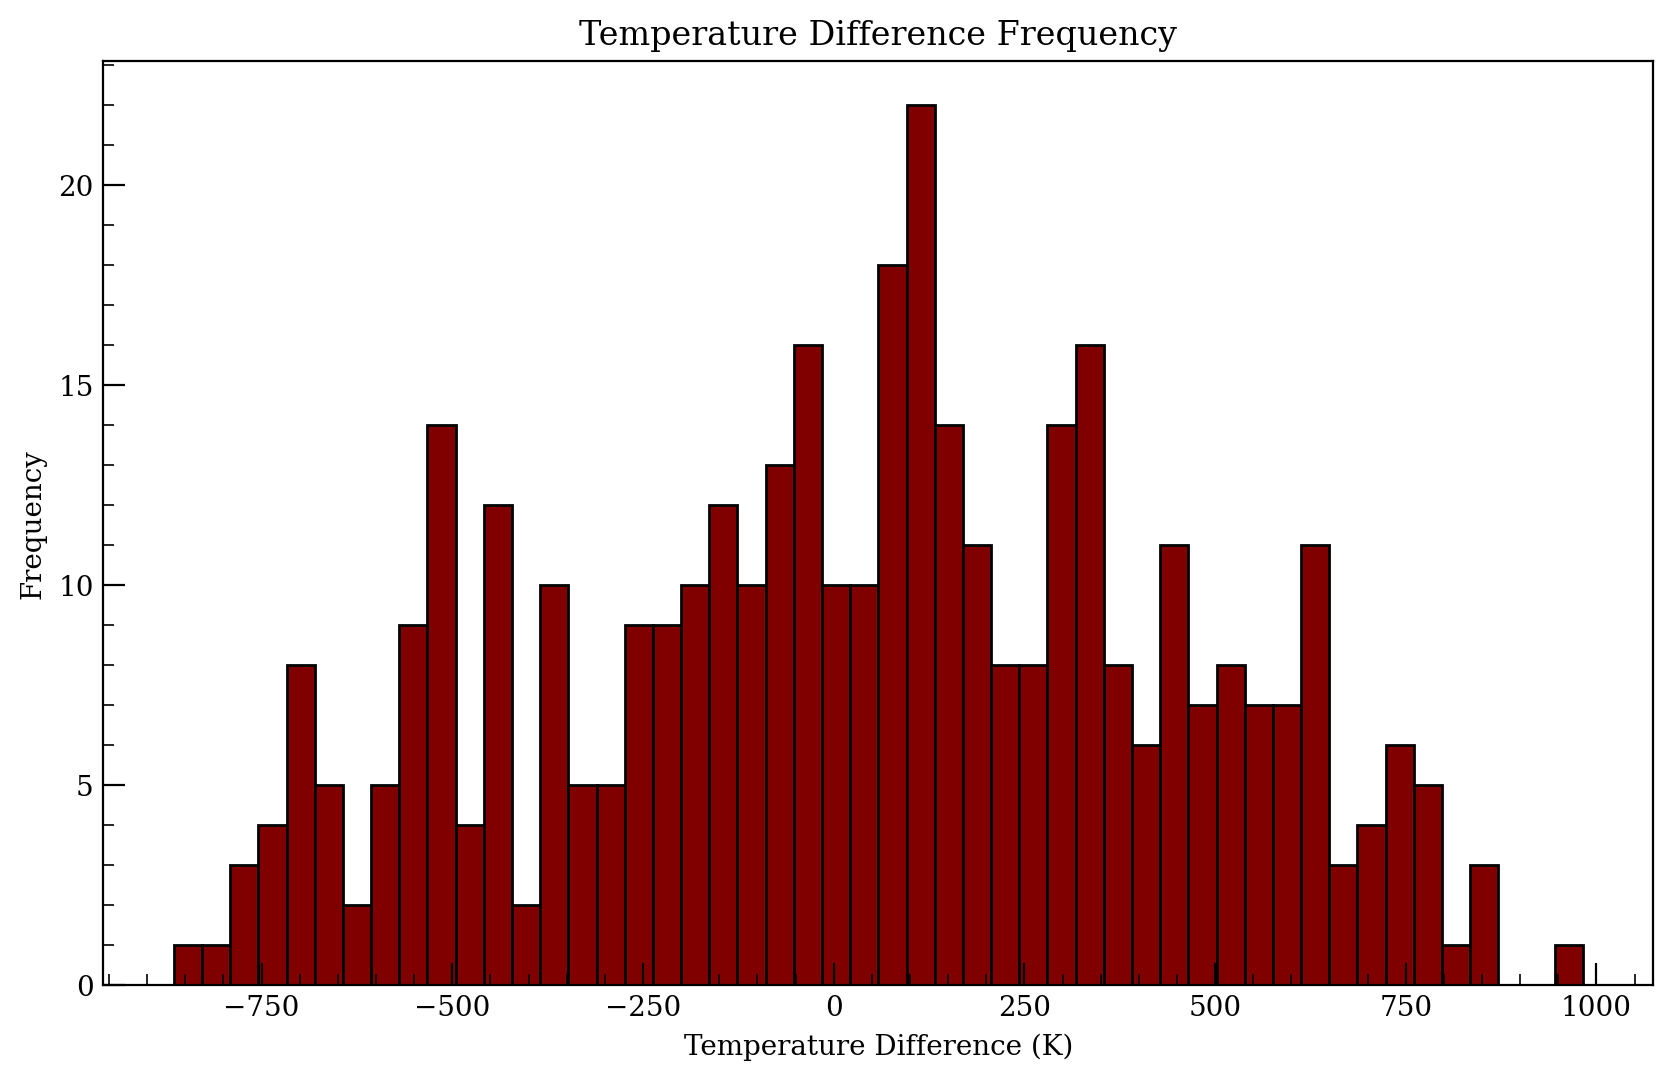

In [53]:
plt.figure(figsize=(10, 6), dpi = 200)
plt.hist(diff['Tdiff'], bins = 50, color = "maroon", edgecolor = "black")

#plt.yscale('log')

plt.xlabel("Temperature Difference (K)")
plt.ylabel("Frequency")

plt.minorticks_on()
plt.tick_params(which='both', direction='in')

plt.title("Temperature Difference Frequency")

plt.show()

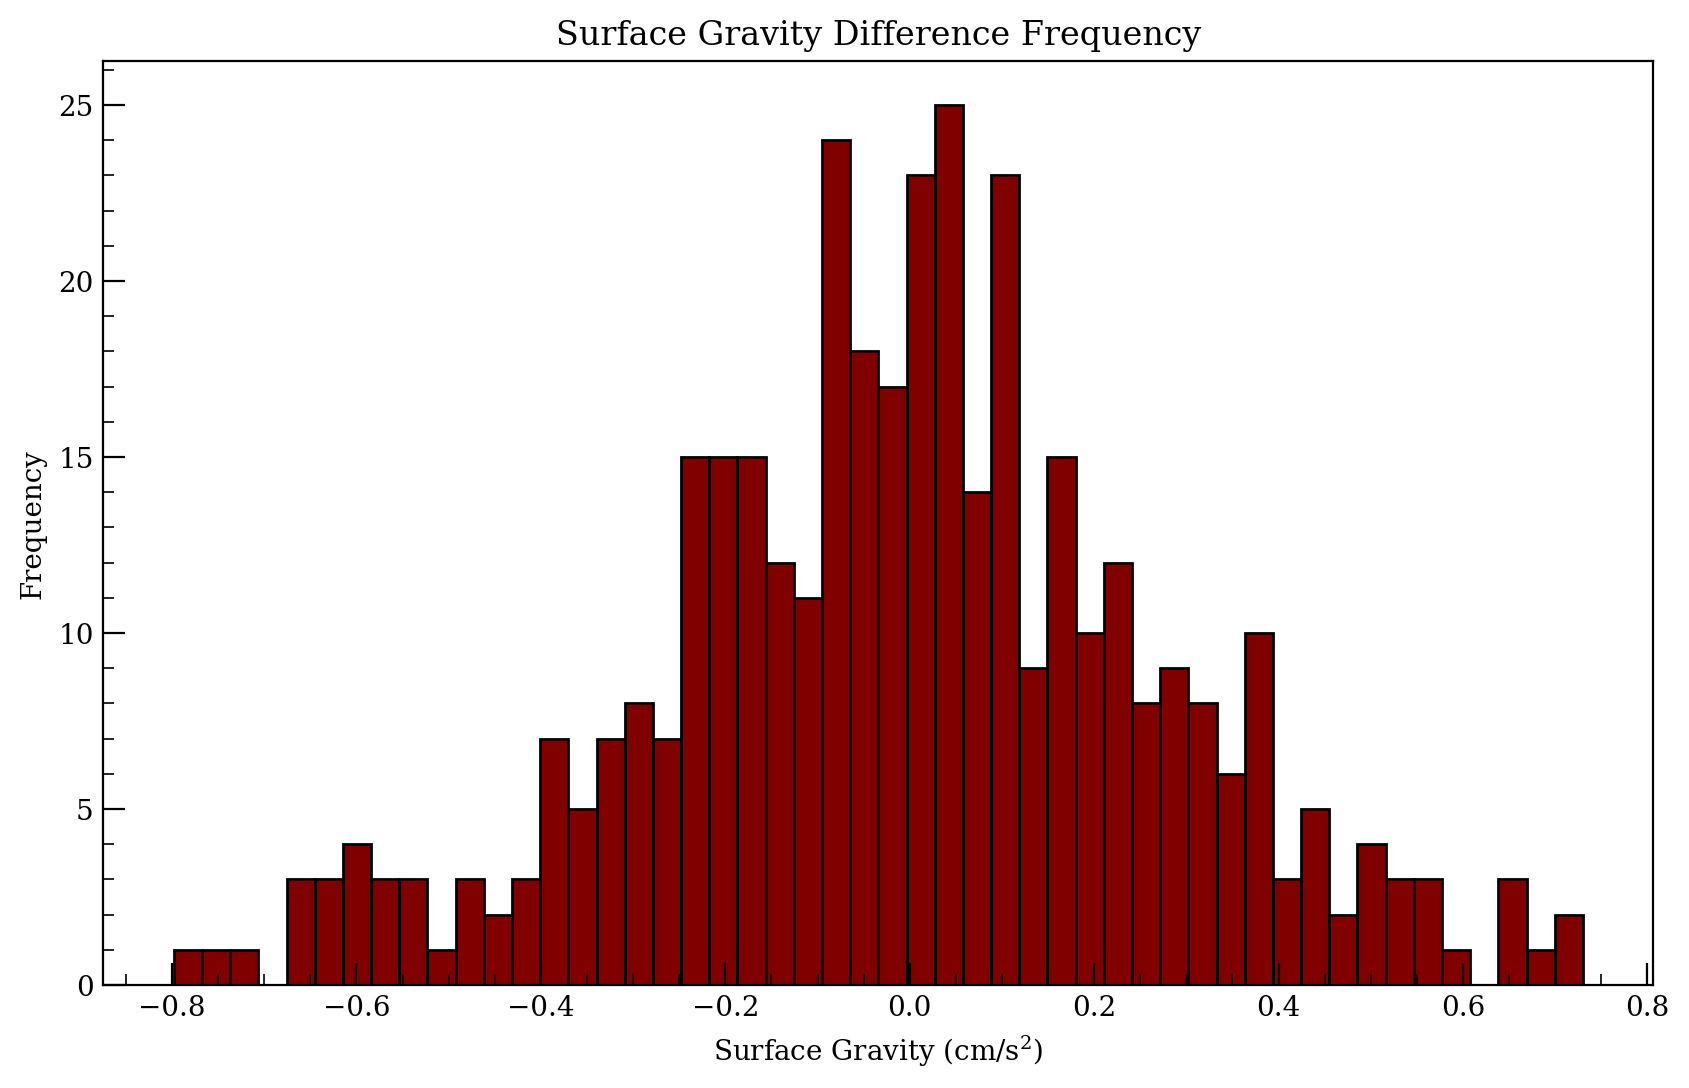

In [55]:
plt.figure(figsize=(10, 6), dpi = 200)
plt.hist(diff['loggdiff'], bins = 50, color = "maroon", edgecolor = "black")

#plt.yscale('log')

plt.xlabel("Surface Gravity ($cm/s^2$)")
plt.ylabel("Frequency")

plt.minorticks_on()
plt.tick_params(which='both', direction='in')

plt.title("Surface Gravity Difference Frequency")

plt.show()